<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [ ]:
data  = pd.read_csv('/content/sample_data/heart_disease.csv')
print(data.sample(6))

     Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
157         157   35    1   1       122   192    0        1      174      0   
92           92   52    1   2       138   223    0        1      169      0   
114         114   55    1   1       130   262    0        1      155      0   
38           38   65    0   2       155   269    0        1      148      0   
64           64   58    1   2       140   211    1        0      165      0   
56           56   48    1   0       122   222    0        0      186      0   

     oldpeak  slope  ca  thal  target  
157      0.0      2   0     2       1  
92       0.0      2   4     2       1  
114      0.0      2   0     2       1  
38       0.8      2   0     2       1  
64       0.0      2   0     2       1  
56       0.0      2   0     2       1  


## Analisis Descriptivos

count: cuenta los valores que sea diferente a nulo

In [ ]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [ ]:
from matplotlib import pyplot as plt
print(data.target.value_counts())
data.plot(kind='scatter', x='age', y='thalach', c="target", colormap="viridis")
plt.show

NameError: name 'data' is not defined

## Segmentar datos


In [ ]:
x = data.drop(['target'], axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 14)
(61, 14)
(242,)
(61,)


In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred[0:10])
print(y_test[0:10])

[0 0 1 0 1 1 1 0 0 1]
179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
Name: target, dtype: int64


## Evaluar el modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print("Precisión del modelo:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.96875
1.0
0.9841269841269841
Precisión del modelo: 0.9836065573770492
[[29  0]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        32

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



## Evaluar cambios de K

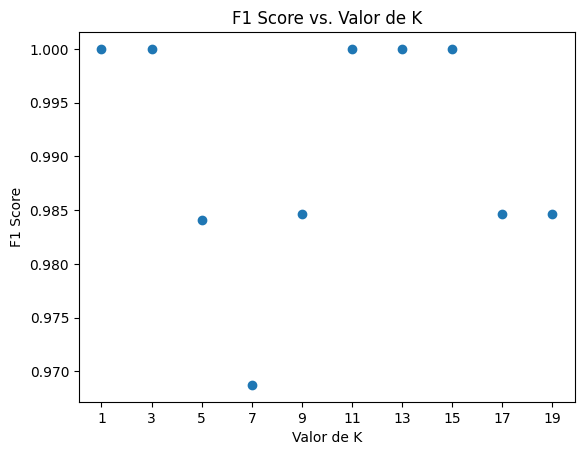

In [ ]:
k_range = range(1, 21, 2)
f1_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)

plt.scatter(k_range, f1_list)
plt.xlabel('Valor de K')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Valor de K')
plt.xticks(k_range)
plt.show()